In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


# Load the data
data = pd.read_stata('final_data.dta', preserve_dtypes=True, convert_categoricals=True)


In [34]:
simplified_data = data[['workhour', 'child', 'tuition', 'city_ave_kinder']]
childn = []
for n in range(0,4):
    childn.append(simplified_data[simplified_data['child'] == n].drop('child', axis=1))

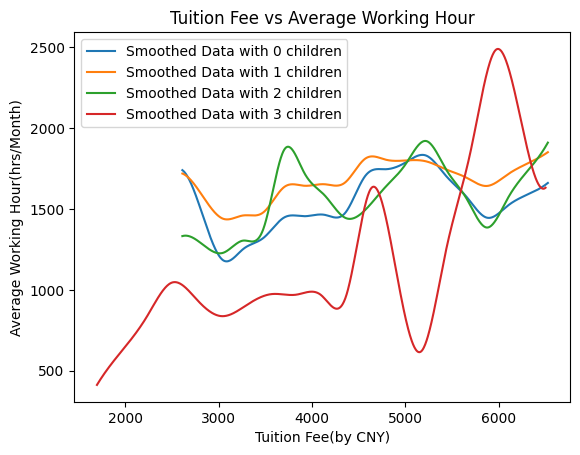

In [42]:
for j in range(0,4):
    dt = childn[j]
    tuition_series = np.linspace(np.percentile(dt['tuition'], 10),np.percentile(dt['tuition'],90),20)
    city_ave_kinder_series = np.linspace(np.percentile(dt['city_ave_kinder'], 10),np.percentile(dt['city_ave_kinder'],90),20)
    average_workinghour = np.zeros(19)
    for k in range(0,19):
        average_workinghour[k] = dt[dt['tuition'].between(tuition_series[k], tuition_series[k+1])]['workhour'].mean()
#    Create a mask for missing values
    mask = np.isnan(average_workinghour)

    # Get the indices of non-missing values
    indices = np.arange(len(average_workinghour))

    # Create an interpolation function using polynomial interpolation
    interp_func = interp1d(indices[~mask], average_workinghour[~mask], kind='linear')

    # Interpolate the missing values
    average_workinghour[mask] = interp_func(indices[mask])

    mid_values = (tuition_series[:-1] + tuition_series[1:]) / 2
    x = mid_values
    y = average_workinghour

    # Smooth the data
    interp_func = interp1d(x, y, kind='cubic')
    smooth_x = np.linspace(x.min(), x.max(), 1000)
    smooth_y = interp_func(smooth_x)

    # Plot the smoothed data
    plt.plot(smooth_x, smooth_y, label='Smoothed Data'+' with '+str(j)+' children')

    # Plot the original data
    #plt.scatter(x[~mask], y[~mask],)

    # Plot the interpolated data points
    #plt.scatter(x[mask], average_workinghour[mask], color='red')

# Add labels and legend
plt.xlabel('Tuition Fee(by CNY)')
plt.ylabel('Average Working Hour(hrs/Month)')
plt.legend()
plt.title('Tuition Fee vs Average Working Hour')
# Show the plot
plt.show()



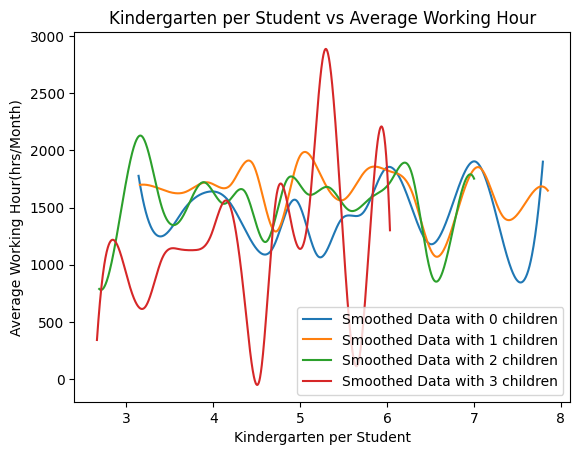

In [46]:
for j in range(0,4):
    dt = childn[j]
    tuition_series = np.linspace(np.percentile(dt['tuition'], 10),np.percentile(dt['tuition'],90),20)
    city_ave_kinder_series = np.linspace(np.percentile(dt['city_ave_kinder'], 10),np.percentile(dt['city_ave_kinder'],90),20)
    series = city_ave_kinder_series
    average_workinghour = np.zeros(19)
    for k in range(0,19):
        average_workinghour[k] = dt[dt['city_ave_kinder'].between(city_ave_kinder_series[k], city_ave_kinder_series[k+1])]['workhour'].mean()
#    Create a mask for missing values
    mask = np.isnan(average_workinghour)

    # Get the indices of non-missing values
    indices = np.arange(len(average_workinghour))

    # Create an interpolation function using polynomial interpolation
    interp_func = interp1d(indices[~mask], average_workinghour[~mask], kind='linear')

    # Interpolate the missing values
    average_workinghour[mask] = interp_func(indices[mask])

    mid_values = (city_ave_kinder_series[:-1] + city_ave_kinder_series[1:]) / 2
    x = mid_values
    y = average_workinghour

    # Smooth the data
    interp_func = interp1d(x, y, kind='cubic')
    smooth_x = np.linspace(x.min(), x.max(), 1000)
    smooth_y = interp_func(smooth_x)

    # Plot the smoothed data
    plt.plot(smooth_x, smooth_y, label='Smoothed Data'+' with '+str(j)+' children')

    # Plot the original data
    #plt.scatter(x[~mask], y[~mask],)

    # Plot the interpolated data points
    #plt.scatter(x[mask], average_workinghour[mask], color='red')

# Add labels and legend
plt.xlabel('Kindergarten per Student')
plt.ylabel('Average Working Hour(hrs/Month)')
plt.legend()
plt.title('Kindergarten per Student vs Average Working Hour')
# Show the plot
plt.show()